Importing necessary libraries

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pylab import plt
from wordcloud import WordCloud

Sample text data

In [170]:
text = ['Hello Rutik here,This osFinal Year Project','That is the Fake News detector Machine learning Model' ]

Initializing TfidfVectorizer and Fitting the vectorizer on the text data

In [171]:
vect = TfidfVectorizer()
vect.fit(text)

TfidfVectorizer()

Printing IDF values of each term

In [172]:
print(vect.idf_)

[1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511]


Printing vocabulary

In [173]:
print(vect.vocabulary_)

{'hello': 2, 'rutik': 11, 'here': 3, 'this': 14, 'osfinal': 9, 'year': 15, 'project': 10, 'that': 12, 'is': 4, 'the': 13, 'fake': 1, 'news': 8, 'detector': 0, 'machine': 6, 'learning': 5, 'model': 7}


A words which is present in all the data, it will have low IDF value. With this unique words will be highlighted using the Max IDF values.  
Transforming a sample text using the fitted vectorizer

In [174]:
example = text[0]
example = vect.transform([example])
print(example.toarray())

[[0.         0.         0.37796447 0.37796447 0.         0.
  0.         0.         0.         0.37796447 0.37796447 0.37796447
  0.         0.         0.37796447 0.37796447]]


Here, 0 is present in the which indexed word, which is not available in given sentence.

__________________________________________________________________________________________________________________________________________________________

## Model Training

Reading the dataset

In [175]:
dataframe = pd.read_csv('news.csv')
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Splitting data into features and labels

Printing the count of null values in each column

In [176]:
print(dataframe.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


Generating a word cloud visualization based on the titles in the DataFrame


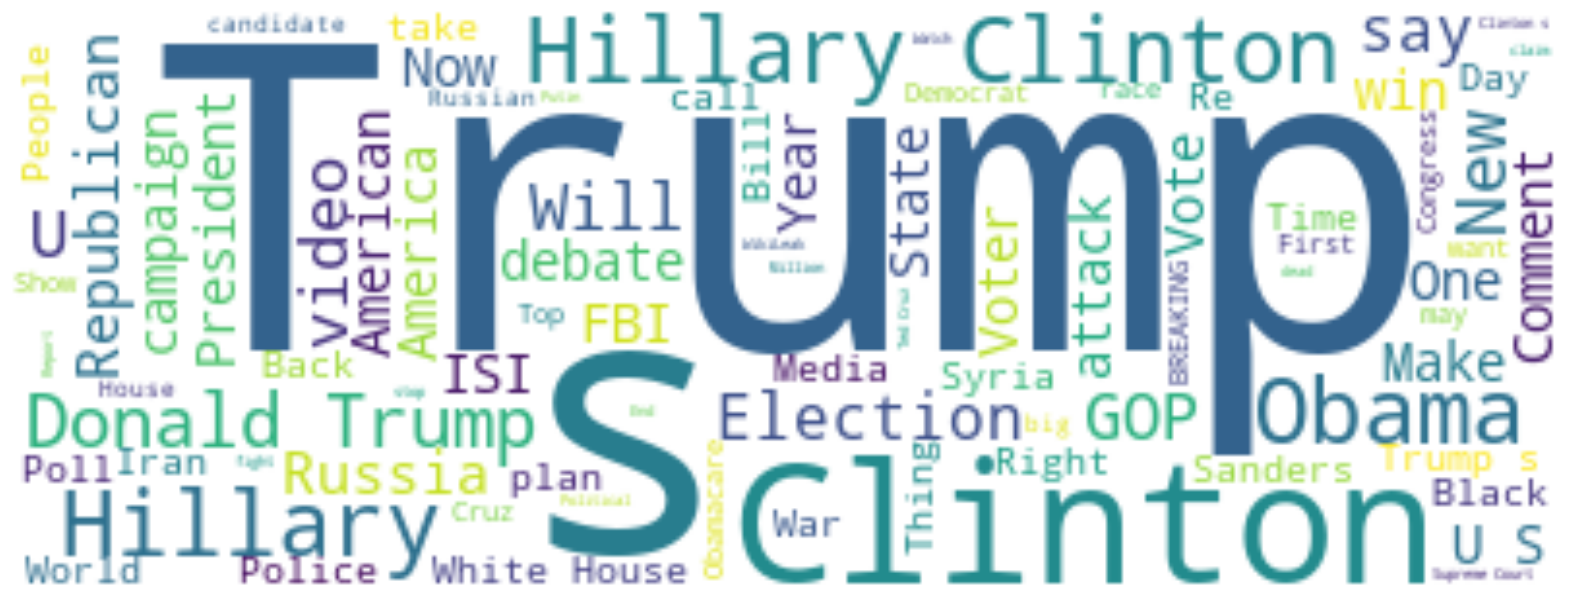

In [177]:
titles = ' '.join(title for title in dataframe['title'])
wordcloud = WordCloud(
    background_color='white',
    max_words=200,
    width=400,   
    height=150,
).generate(titles)
plt.figure(figsize=(20, 10))   
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off") 
plt.show()

In [178]:
x = dataframe['text']
y = dataframe['label']

x that is "text"

In [179]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

y that is "label"

In [180]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [181]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [182]:
dataframe.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


Plotting the distribution of body lengths for "Fake" and "Real" labels in the dataframe.


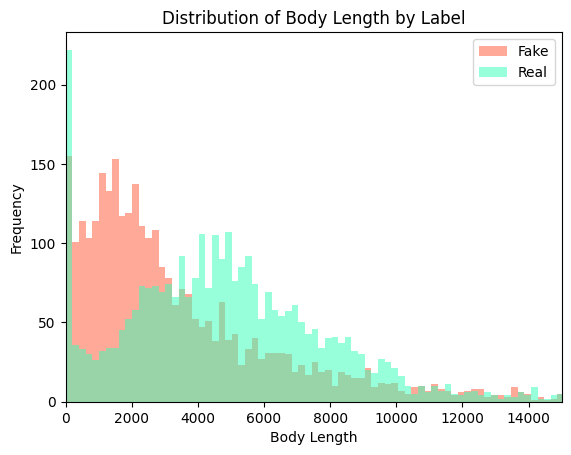

In [183]:
if 'body_len' not in dataframe.columns:
    dataframe['body_len'] = dataframe['text'].apply(len)

bins = np.linspace(0, 40000, 200)
plt.hist(dataframe[dataframe["label"] == 'FAKE']["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(dataframe[dataframe["label"] == 'REAL']["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper right")
plt.xlabel("Body Length")
plt.ylabel("Frequency")
plt.title("Distribution of Body Length by Label")
plt.xlim(0, 15000)
plt.show()


In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

Initializing TfidfVectorizer

In [185]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)

Fitting and transforming the training data

In [186]:
tfid_x_train = tfvect.fit_transform(x_train)

Transforming the testing data

In [187]:
tfid_x_test = tfvect.transform(x_test)

____________________________________________________________________________________________________________________________________________________
### Passive Aggressive Classifier

##### Passive-Aggressive classifiers are a family of machine learning algorithms designed for online learning and large-scale data scenarios. They are named for their behavior:

- Passive: If a prediction is correct, no changes are made to the model.
- Aggressive: If a prediction is incorrect, the model updates its parameters to correct the mistake.
- They are suitable for:
    - Handling large datasets where traditional batch learning is impractical.
    - Sequential data streams where examples arrive one by one.
    - Dynamic environments where data distributions may change over time.
Key parameters include:
Regularization parameter (C) to control the penalty for incorrect predictions.
Maximum iterations (max_iter) to limit training time.
Tolerance (tol) for stopping criterion.
Overall, they offer efficiency, adaptability, and scalability in learning from vast and evolving datasets.

#### Initializing the PassiveAggressiveClassifier
- max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
- max_df = 25 means "ignore terms that appear in more than 25 documents".

In [188]:
pa_classifier = PassiveAggressiveClassifier(max_iter=50)

Fitting the classifier on the training data

In [189]:
pa_classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

 Predicting labels for the testing data

In [190]:
y_pred = pa_classifier.predict(tfid_x_test)

In [191]:
cf = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(cf)

[[572  43]
 [ 41 611]]


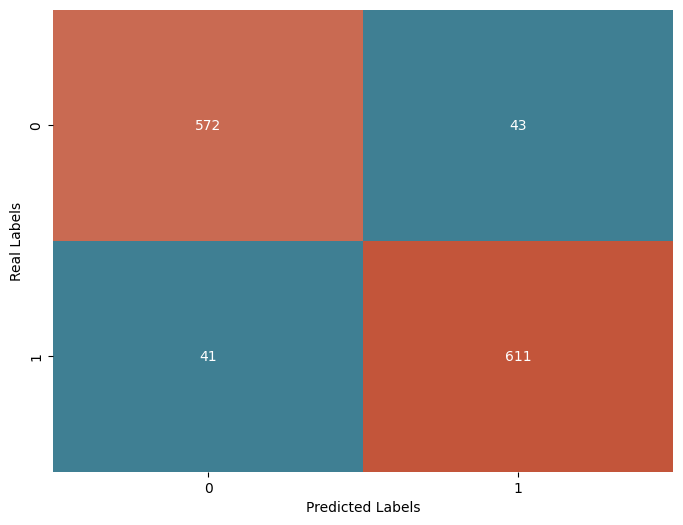

In [192]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='', cmap=sns.diverging_palette(220, 20, as_cmap=True), cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
plt.show()

Calculating accuracy

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       615
        REAL       0.93      0.94      0.94       652

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



___________________________________________________________________________________________________________________________________________________________

## Random Forest Classification
Random Forest Classification is an ensemble learning technique used for classification tasks. It builds multiple decision trees during training, each based on a random subset of the training data and a random subset of features.

- Ensemble Learning: Combines multiple decision trees to make predictions, leading to more accurate and robust results.
- Decision Trees: Each tree is built using a subset of data and features, which introduces diversity and reduces overfitting.
- Bagging: It uses a technique called Bootstrap Aggregating (bagging) to create diverse subsets of data for each tree.
- Voting: During prediction, each tree "votes" for a class, and the class with the most votes becomes the final prediction.
- Feature Importance: Provides insights into the importance of different features in making predictions.

In [194]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)
model = RandomForestClassifier(n_estimators=300)
model.fit(count_train, y_train)


RandomForestClassifier(n_estimators=300)

In [195]:
y_pred = model.predict(count_test)

In [196]:
cf = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(cf)

[[550  65]
 [ 53 599]]


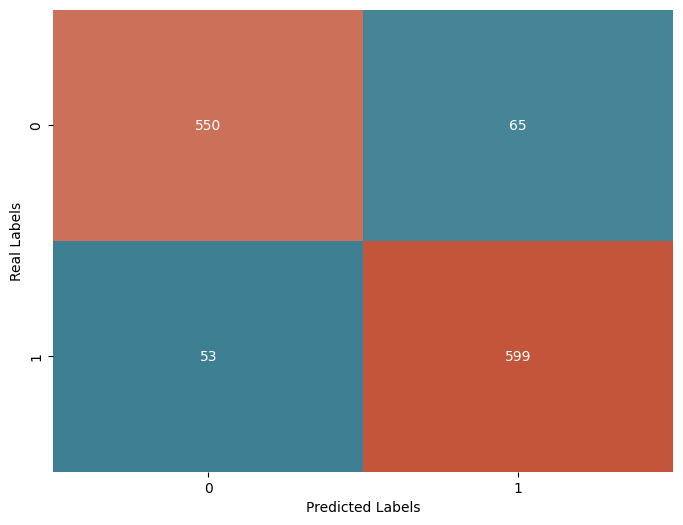

In [197]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='', cmap=sns.diverging_palette(220, 20, as_cmap=True), cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
plt.show()

In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.91      0.89      0.90       615
        REAL       0.90      0.92      0.91       652

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



___________________________________________________________________________________________________________________________________________________________

## Naive Bayes Classifiers

Naive Bayes Classifiers are a family of classification algorithms based on Bayes' Theorem. Despite their simplistic assumption of feature independence, they are widely used due to their simplicity and efficiency in machine learning.

- Baye's Theorem: Naive Bayes classifiers are based on Bayes' Theorem, which calculates the probability of a hypothesis given the evidence.
- Collection of Algorithms: It's not a single algorithm but a family of algorithms, including Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes, among others.
- Feature Independence: The "naive" assumption of Naive Bayes is that all features are independent of each other given the class label. Despite this oversimplification, Naive Bayes can still be effective in many practical scenarios.
- Text Classification: Naive Bayes is commonly used in text classification tasks, such as spam filtering, sentiment analysis, and rating classification. It's well-suited for these tasks due to its simplicity and efficiency, especially in high-dimensional data.
- Speed and Efficiency: Naive Bayes classifiers are known for their speed and ease of implementation. They can make predictions quickly, even with high-dimensional data.
- Probabilistic Classifier: Naive Bayes predicts the probability of an instance belonging to a class given its features. It assumes that features are conditionally independent, making it a probabilistic classifier.
- Origin of the Name: The "Naive" part of the name refers to the simplifying assumption of feature independence. The "Bayes" part pays homage to Reverend Thomas Bayes, the statistician who formulated Bayes' Theorem.

In [199]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)


MultinomialNB()

In [200]:
y_pred = nb_classifier.predict(count_test)

In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.92      0.83      0.87       615
        REAL       0.85      0.93      0.89       652

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



___________________________________________________________________________________________________________________________________________________________

Generating confusion matrix for the predictions

In [202]:
cf = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(cf)


[[510 105]
 [ 47 605]]


Plotting the confusion matrix using a heatmap

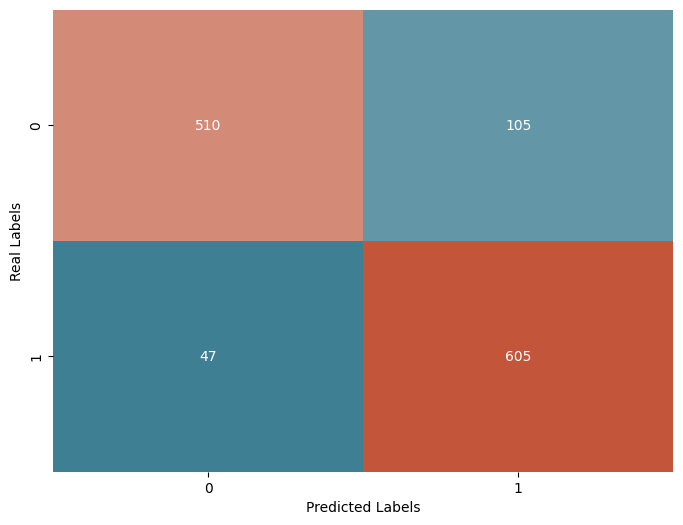

In [203]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='', cmap=sns.diverging_palette(220, 20, as_cmap=True), cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
plt.show()

__________________________________________________________________________________________________________________________________________________________

Function to classfies the news that is real or fake

In [204]:
def news_classifier_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = pa_classifier.predict(vectorized_input_data)
    print(prediction)

Example usage of news_classifier_det function

In [205]:
news_classifier_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [206]:
news_classifier_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


__________________________________________________________________________________________________________________________________________________________

Saving the model to disk

In [207]:
import pickle
pickle.dump(pa_classifier,open('model.pkl', 'wb'))

 load the model from disk

In [208]:
loaded_model = pickle.load(open('model.pkl', 'rb'))

__________________________________________________________________________________________________________________________________________________________

Function to detect fake news using the loaded model

In [209]:
def news_classifier_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

Example usage of news_classifier_det function

In [210]:
news_classifier_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [211]:
news_classifier_det("""U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.""")

['REAL']


In [1]:
a=5
a

5

__________________________________________________________________________________________________________________________________________________________